In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [63]:
datos = pd.read_csv("C:/Users/david/segundaEvaluacion/Conjunto de Datos/cliente_tienda.csv")

In [64]:
data = datos[['Ingresos Anuales ($)', 'Porcentaje de gastos (1-100)']]

In [65]:
data_escalada = preprocessing.StandardScaler().fit_transform(data)

In [66]:
Nc = range(1, 11)
kmeans = [KMeans(n_clusters=i, random_state=1) for i in Nc]
scores = [kmeans[i].fit(data_escalada).inertia_ for i in range(len(kmeans))]

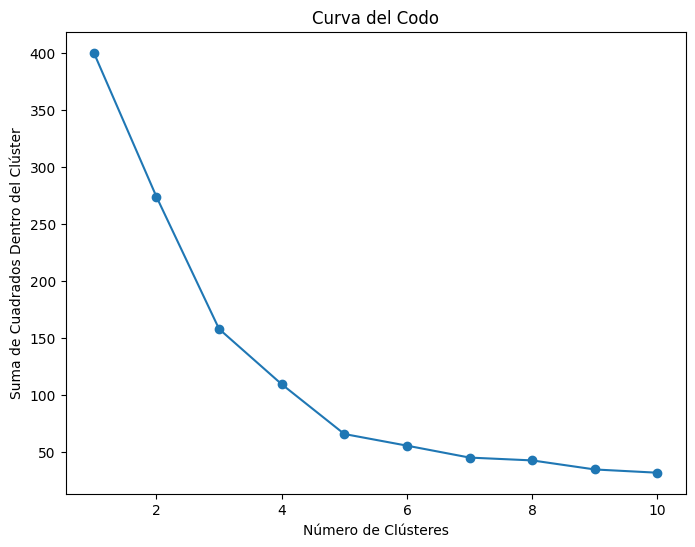

In [67]:
plt.figure(figsize=(8, 6))
plt.plot(Nc, scores, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Suma de Cuadrados Dentro del Clúster')
plt.title('Curva del Codo')
plt.show()

In [68]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=1)
kmeans.fit(data_escalada)

KMeans(n_clusters=5, random_state=1)

In [69]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [70]:
datos['Cluster'] = labels

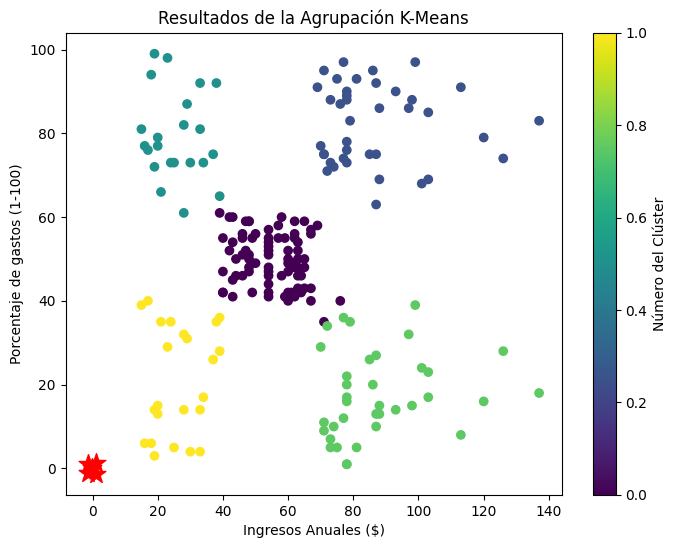

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Ingresos Anuales ($)'], data['Porcentaje de gastos (1-100)'], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='red')
plt.xlabel('Ingresos Anuales ($)')
plt.ylabel('Porcentaje de gastos (1-100)')
plt.title('Resultados de la Agrupación K-Means')
plt.colorbar(label='Número del Clúster')
plt.show()